# ПРОЕКТ "Аналитика в авиакомпании F9"

> # Цель проекта:
Анализ интенсивости рейсов авиакомпании "F9" по городам России и маркам самолетов компании.

> # Задачи проекта:
- Импортировать библиотеки, необходимые для исследования.
- Импортировать файлы .csv.
- Изучить информацию, содержащуюся в файлах.
- Проверить файлы на корректность данных, провести предобработку.
- Выбрать топ-10 городов по количеству рейсов, построить график зависимости.
- Построить графики зависимости: "Модели самолетов и количество рейсов", "Города и количество рейсов".
- Сделать выводы, исходя из полученных результатов.


____

# Оглавление:
- <a id='1'>Импорт библиотек</a>
- <a id='2'>Импорт первого датасета, вывод sample</a>
- <a id='4'>Импорт второго датасета, вывод sample</a>
- <a id='7'>Вывод info()</a>
- <a id='10'>Проверка датасетов на наличие пропусков</a>
- <a id='10'>Промежуточные результаты</a>
- <a id='12'>Выбор топ-10 городов по количеству рейсов</a>
- <a id='13'>Гистограмма "Топ-10 городов по количеству рейсов"</a>
- <a id='13'>Промежуточные выводы</a>
- <a id='14'>График "Количество рейсов в зависимости от модели самолета</a>
- <a id='14'>Промежуточные выводы</a>
- <a id='15'>График "Количество рейсов авиакомпании F9 по городам России</a>
- <a id='15'>Промежуточные выводы</a>
- <a id='15'>Окончательные выводы</a>


___

## Импорт и предобработка данных

In [1]:
# Импортируем библиотеки, необходимые для анализа
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Импортируем первый файл
df_1=pd.read_csv('/datasets/query_1.csv')

In [3]:
# Выводим sample для df_1
df_1.sample (5)

,model,flights_amount
2,Boeing 737-300,630
3,Boeing 767-300,600
6,Cessna 208 Caravan,4557
5,Bombardier CRJ-200,4446
4,Boeing 777-300,300


In [4]:
# Импортируем второй файл
df_2=pd.read_csv('/datasets/query_3.csv')

In [5]:
# Выводим sample для df_2
df_2.sample (10)

,city,average_flights
55,Новый Уренгой,8.290323
42,Мирный,6.290323
57,Ноябрьск,3.000000
44,Мурманск,2.000000
60,Оренбург,5.000000
10,Брянск,10.000000
86,Усинск,1.000000
49,Нефтеюганск,1.000000
1,Анадырь,1.000000
52,Нижний Новгород,5.870968


In [6]:
# Пишем функцию для вывода info()
def info (dataframe):
    print (dataframe.info())

In [7]:
# Выводим info() для df_1
info(df_1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes
None


In [8]:
# Выводим info() для df_2
info(df_2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB
None


In [9]:
# Пишем функцию для проверки наличия пропусков
def isnull (dataframe):
    print(dataframe.isnull().sum().sort_values())

In [10]:
# Проверяем df_1 на наличие пропусков
isnull(df_1)

model             0
flights_amount    0
dtype: int64


In [11]:
# Проверяем df_2 на наличие пропусков
isnull(df_2)

city               0
average_flights    0
dtype: int64


### Промежуточные результаты:
- Данные датасетов импортированы и прочитаны.
- Первый датасет (df_1) содежит объекты и целочисленные данные.
- Второй датасет (df_2) содержит объеты и числа двойной точности.
- Датасеты не содержат пропусков.

___

## Выбор Топ-10 городов по количеству рейсов

In [12]:
# Выводим топ-10 городов по количеству рейсов за день
df_2_top= df_2.sort_values(by='average_flights', ascending=False).head(10)
df_2_top

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612903
84,Ульяновск,9.580645


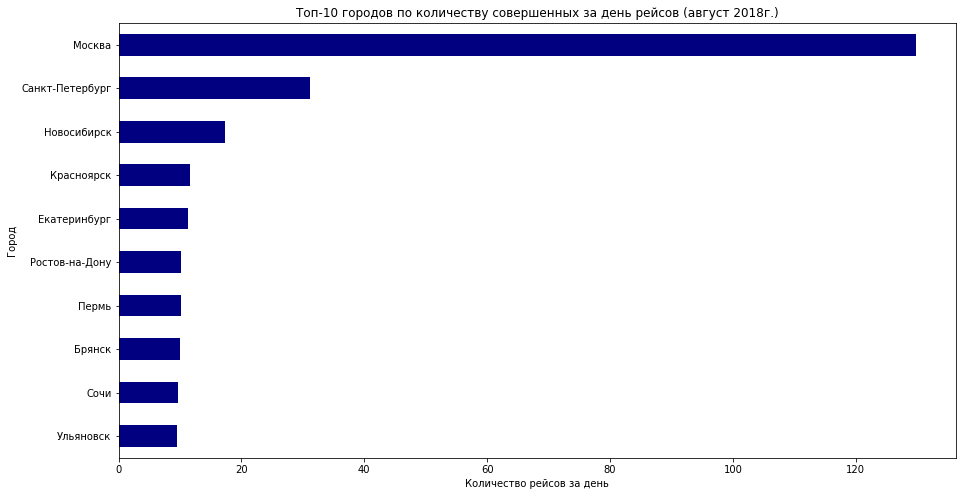

In [13]:
# Иллюстрируем результаты гистограммой
df_2_top.sort_values(by='average_flights').\
plot(kind='barh', x='city', y='average_flights', legend=False, grid=False, color='navy', figsize= (15, 8))
plt.title('Топ-10 городов по количеству совершенных за день рейсов (август 2018г.)')
plt.ylabel('Город')
plt.xlabel ('Количество рейсов за день')
plt.show()

### Промежуточные выводы:
- Из топ-10 городов по количеству совершенных рейсов, несомненно лидирует Москва. Это самый крупный транспортный хаб в России (что, кстати, самым негативным образом сказывается на национальной логистике).
- Семь городов из топ-10 - это города-миллионники.
- Брянск, Сочи и Ульяновск - крупные региональные центры. Сочи, к тому же, еще и курорт.

___

## Графики зависимости

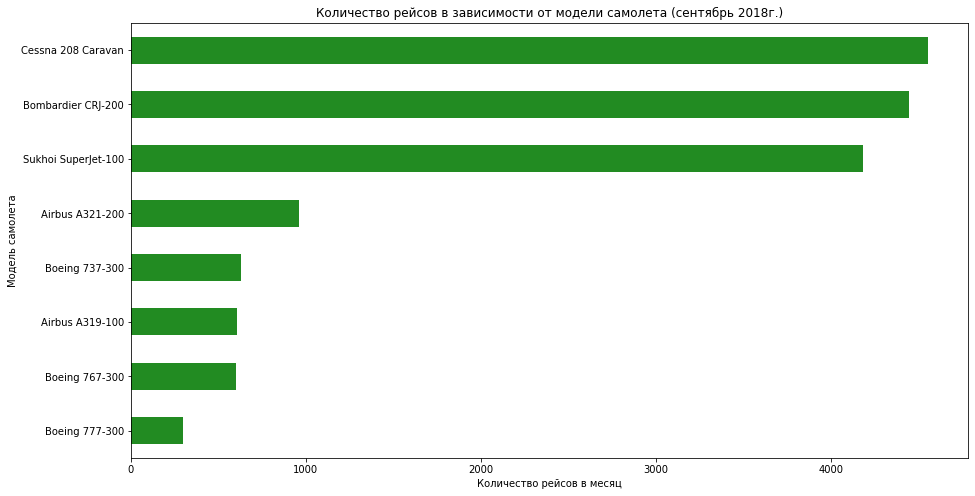

In [14]:
# Зависимость количества рейсов от модели самолета 
df_1.sort_values(by='flights_amount').\
plot(kind='barh', x='model', y='flights_amount', legend=False, grid=False, color='forestgreen', figsize= (15, 8))
plt.title('Количество рейсов в зависимости от модели самолета (сентябрь 2018г.)')
plt.ylabel('Модель самолета')
plt.xlabel ('Количество рейсов в месяц')
plt.show()

### Промежуточные выводы:
- Самолеты марок Cessna, Bombardier и Superjet авиакомпании "F9" за месяц совершают более 4000 рейсов. Такое количество рейсов, видимо, связано с тем, что это рейсы в пределах областей и межобластные перелеты: самолеты данных марок являются ближнемагистральными, перевозят небольшое количество пассажиров (максимальная вместимость SuperJet-100 - 98 человек) и могут работать в режиме "аэротакси" (особенно Cessna). 
- Airbus A321, Airbus A319 и Boeing 737-300 - среднемагистральные самолеты. За один рейс они могут перевозить гораздо больше пассажиров, чем самолеты из первой группы, но и использовать их на рейсах малой протяженности экономически невыгодно: данные модели совершают рейсы между регионами и соседними федеральными округами.
- Boeing 767 и Boeing 777 - дальнемагистральные, широкофюзеляжные самолеты. За один рейс они могут перевезти максимальное количество пассажиров. Соответственно, количество рейсов за месяц для этих моделей минимально при максимальной загрузке пассажирами.

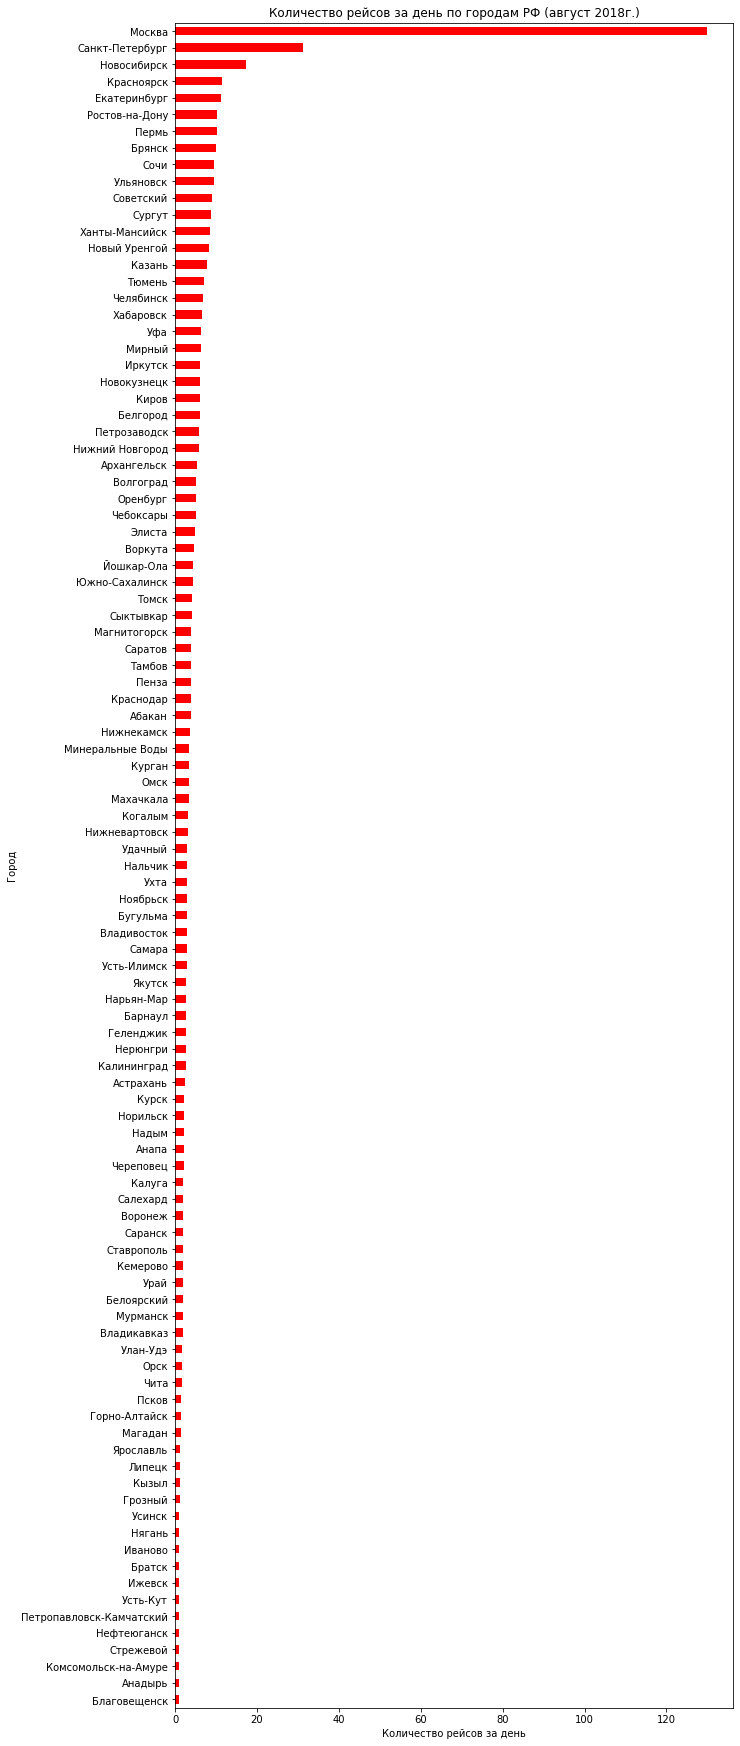

In [15]:
# Количество рейсов авиакомпании F9 в РФ за один день августа 2018 года
df_2.sort_values(by='average_flights').\
plot(kind='barh', x='city', y='average_flights', legend=False, grid=False, color='red', figsize= (10, 31))
plt.title('Количество рейсов за день по городам РФ (август 2018г.)')
plt.ylabel('Город')
plt.xlabel ('Количество рейсов за день')
plt.show()

### Промежуточные выводы:
- Только из десяти городов РФ, авиакомпания F9 совершает десять и больше рейсов ежедневно (данные за август 2018 года).
- В остальных случаях (91 город РФ) количество рейсов не превышает десятка.
- Возможно, аэропорты некоторых городов используются самолетами компании для дозаправки.

___

## Общие выводы:
- Из десяти городов РФ самолеты авиакомпании F9 совершают от 10 до 130 вылетов ежедневно.
- Менее десяти вылетов самолеты авиакомпании совершают из 91 города.
- Наиболее часто (свыше 4000 рейсов в месяц) летают ближнемагистральные узкофюзеляжные самолеты компании. Такие самолеты обслуживают региональные маршруты, совершая рейсы в пределах одного субъекта либо между соседними областями. По всей видимости, даже из Москвы, Санкт-Петербурга и Новосибирска наибольшее количество рейсов приходится на долю именно ближнемагистральных самолетов компании.
- Средне - и дальнемагистральные самолеты компании совершают до 1000 вылетов в месяц. Этот факт можно объяснить несколькими причинами (в условиях отсутствия информации о фактическом авиа-парке компании). Первая причина: средне-дальнемагистральные самолеты совершают меньшее число рейсов из-за того, что за один рейс они могут перевезти гораздо больше пассажиров, чем узкофюзеляжные самолеты и поэтому им не нужно совершать большое количество рейсов за единицу времени, работая в режиме "аэротакси". Вторая причина: F9 изначально ориентирована на региональные ближнемагистральные перевозки пассажиров и поэтому ее парк представлен, в основном, самолетами марки Cessna, Bombardier и SuperJet.

